In [28]:
import pandas as pd
import pingouin as pg
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, kendalltau
from read_data import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Main text analyses

In [29]:
allsubjdata = pd.read_csv('data/allsubjdata.csv')

In [30]:
allsubjdata

,scene,expected,initview,finalview,img_2,img_3,img_4,probe_1,probe_2,int_diff,p_exp,response,corr_resp,hit,rt,subject,date,time
0,7.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0040.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,Translate_Views_FixedLight/Scene7_-1.0_0090_-0...,-0.500,0.75,f,j,0.0,361.3,912,20220511,1652269698441
1,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,Translate_Views_FixedLight/Scene1_-1.0_0030_-0...,-0.550,0.75,f,f,1.0,381.1,912,20220511,1652269698441
2,10.0,1.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene10_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0035.png,Zoom_Sequences_FixedLight/Scene10_-1.0_0050.png,Translate_Views_FixedLight/Scene10_-1.0_0090_-...,Translate_Views_FixedLight/Scene10_-1.0_0090_0...,0.550,0.75,j,j,1.0,330.1,912,20220511,1652269698441
3,3.0,1.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene3_2.0_0015.png,Zoom_Sequences_FixedLight/Scene3_2.0_0055.png,Zoom_Sequences_FixedLight/Scene3_2.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.5...,0.500,0.75,f,j,0.0,332.1,912,20220511,1652269698441
4,1.0,1.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,Translate_Views_FixedLight/Scene1_-1.0_0030_0....,0.550,0.75,f,j,0.0,603.4,912,20220511,1652269698441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53179,1.0,0.0,-1.0,30.0,Zoom_Sequences_FixedLight/Scene1_-1.0_0015.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene1_-1.0_0025.png,Translate_Views_FixedLight/Scene1_2.0_0030_0.0...,Translate_Views_FixedLight/Scene1_2.0_0030_1.0...,0.950,0.25,NaN,j,NaN,NaN,1459,20220910,1662807993840
53180,7.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene7_-1.0_0025.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0030.png,Zoom_Sequences_FixedLight/Scene7_-1.0_0050.png,Translate_Views_FixedLight/Scene7_2.0_0090_-0....,Translate_Views_FixedLight/Scene7_2.0_0090_-1....,-0.950,0.25,j,j,1.0,475.6,1459,20220910,1662807993840
53181,1.0,0.0,2.0,90.0,Zoom_Sequences_FixedLight/Scene1_2.0_0015.png,Zoom_Sequences_FixedLight/Scene1_2.0_0020.png,Zoom_Sequences_FixedLight/Scene1_2.0_0040.png,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,Translate_Views_FixedLight/Scene1_-1.0_0090_0....,0.925,0.25,f,f,1.0,398.3,1459,20220910,1662807993840
53182,3.0,0.0,-1.0,90.0,Zoom_Sequences_FixedLight/Scene3_-1.0_0020.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0045.png,Zoom_Sequences_FixedLight/Scene3_-1.0_0060.png,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,Translate_Views_FixedLight/Scene3_2.0_0090_0.0...,-0.925,0.25,f,f,1.0,344.6,1459,20220910,1662807993840


In [31]:
exclude_subjs = subject_exclusion(allsubjdata)
allsubjdata_noexcl = allsubjdata.copy()
allsubjdata = allsubjdata[~allsubjdata.subject.isin(exclude_subjs)]
print(f'Excluded {len(exclude_subjs)} out of {allsubjdata_noexcl.subject.nunique()} subjects.')
print('Final sample size:', allsubjdata.subject.nunique())

Excluded 126 out of 277 subjects.
Final sample size: 151


In [32]:
# Get mean accuracy per participant, for each experiment
allsubjdata = compute_dprimes(allsubjdata)
allsubjdata['int_diff'] = allsubjdata['int_diff'].abs()
p75data = allsubjdata[allsubjdata['p_exp']==0.75]
p50data = allsubjdata[allsubjdata['p_exp']==0.5]
p25data = allsubjdata[allsubjdata['p_exp']==0.25]
p75means = p75data.groupby(['subject', 'expected']).mean().reset_index()
p50means = p50data.groupby(['subject', 'expected']).mean().reset_index()
p25means = p25data.groupby(['subject', 'expected']).mean().reset_index()
allmeans = allsubjdata.groupby(['subject', 'expected', 'p_exp']).mean().reset_index()

In [33]:
allmeans

,subject,expected,p_exp,scene,initview,finalview,int_diff,hit,rt,date,time,dprime,criterion
0,914,0.0,0.75,5.25,0.5,60.0,0.608333,0.680851,927.812766,20220511,1652269532447,0.861424,-0.075222
1,914,1.0,0.75,5.25,0.5,60.0,0.602778,0.776224,806.628671,20220511,1652269532447,1.511193,0.091289
2,917,0.0,0.75,5.25,0.5,60.0,0.298958,0.687500,661.875000,20220511,1652272664335,1.032268,0.371013
3,917,1.0,0.75,5.25,0.5,60.0,0.331424,0.743056,689.201389,20220511,1652272664335,1.304992,0.280835
4,926,0.0,0.75,5.25,0.5,60.0,0.497396,0.583333,470.512500,20220511,1652279389985,0.539800,0.404590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1457,1.0,0.25,5.25,0.5,60.0,0.563542,0.625000,483.004167,20220909,1662735197563,0.591449,0.186524
298,1458,0.0,0.25,5.25,0.5,60.0,0.901910,0.673611,603.143750,20220910,1662802413631,0.886217,0.031403
299,1458,1.0,0.25,5.25,0.5,60.0,0.905729,0.750000,578.777083,20220910,1662802413631,1.407480,0.323414
300,1459,0.0,0.25,5.25,0.5,60.0,0.974479,0.633803,634.678169,20220910,1662807993840,0.668455,0.567713


<AxesSubplot:xlabel='p_exp', ylabel='int_diff'>

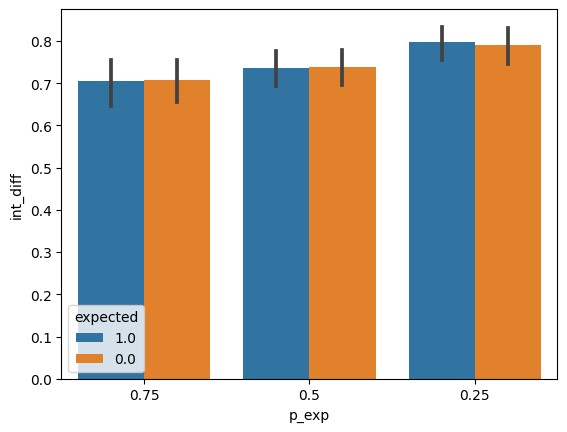

In [34]:
sns.barplot(data=allmeans, x='p_exp', order=[0.75, 0.5, 0.25], y='int_diff',
            hue='expected', hue_order=[1.0, 0.0])

In [35]:
pg.mixed_anova(data=allmeans[allmeans['p_exp'].isin([0.75, 0.25])], subject='subject', between='p_exp',
               within='expected', dv='int_diff')

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,p_exp,0.378078,1,99,0.378078,6.420807,0.012847,0.060906,NaN
1,expected,0.000240,1,99,0.000240,1.151194,0.285908,0.011495,1.0
2,Interaction,0.000738,1,99,0.000738,3.548832,0.062522,0.034606,NaN


### Experiment 1

In [88]:
p75_overall = p75data.groupby(['subject']).mean().reset_index()
p75_overall['hit'].agg(['mean', 'sem'])

mean    0.677963
sem     0.007583
Name: hit, dtype: float64

In [90]:
p75_overall['criterion'].mean()

0.16718513033772633

In [91]:
pg.ttest(p75_overall['criterion'], 0.0)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,5.442079,49,two-sided,0.000002,"[0.11, 0.23]",0.769626,1.012e+04,0.999628


In [68]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.650657  0.010799  0.787876  0.057326 -0.002895  0.046794
1.0       0.687042  0.008407  1.015837  0.048967  0.223878  0.034153

In [74]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.169645,49,two-sided,0.00263,"[0.01, 0.06]",0.531722,12.046,0.957756


In [75]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.69559,49,two-sided,0.000553,"[0.1, 0.35]",0.604733,48.483,0.987158


In [71]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.489235,49,two-sided,0.000043,"[0.13, 0.33]",0.782897,492.785,0.999735


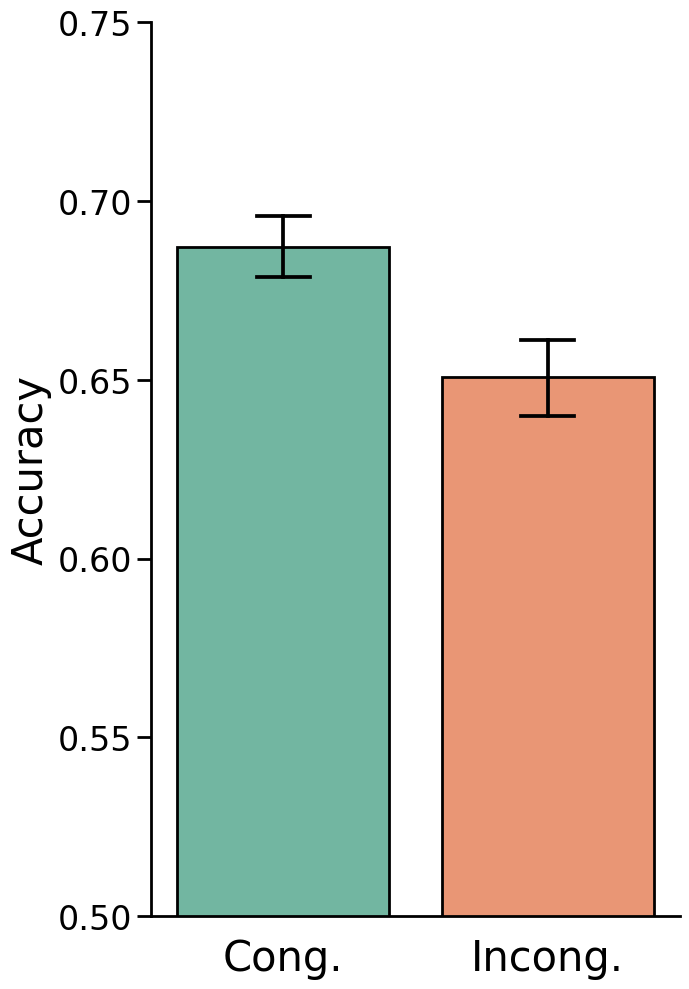

In [40]:
# Plot accuracy for congruent and incongruent trials
make_pretty_plot(p75means, measure='hit', cloudplot=False, saveimg=True)

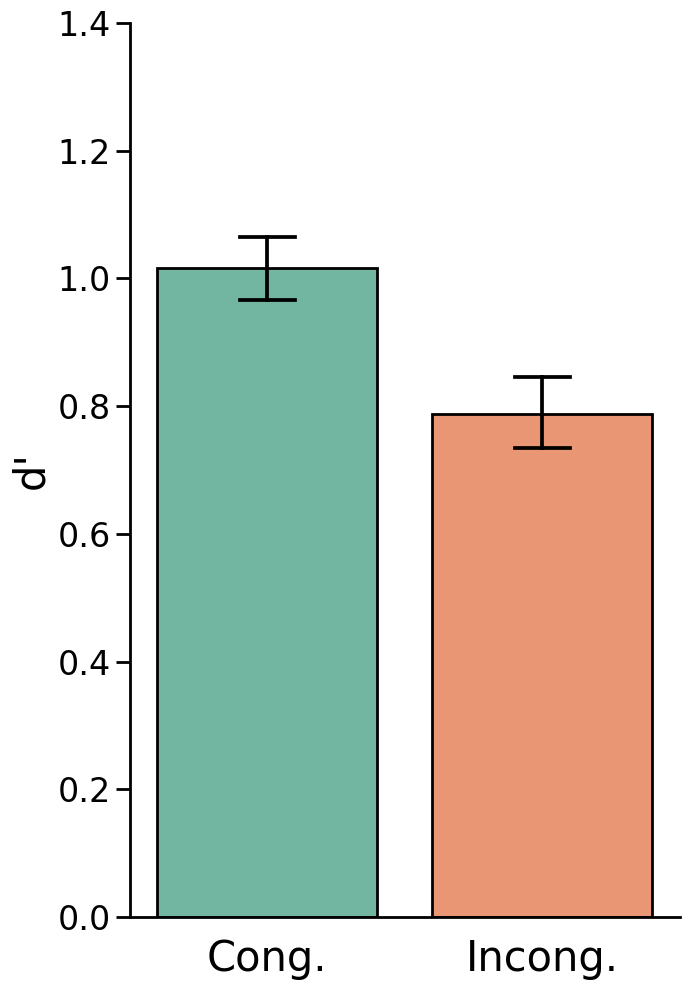

In [60]:
make_pretty_plot(p75means, measure='dprime', cloudplot=False, saveimg=True)

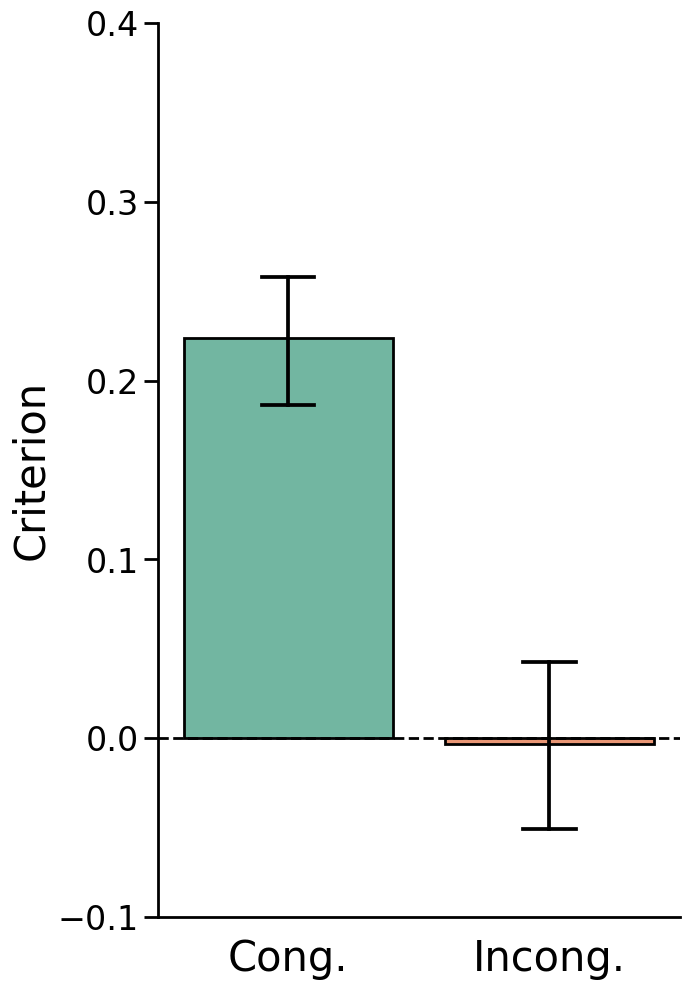

In [42]:
make_pretty_plot(p75means, measure='criterion', cloudplot=False, saveimg=True)

### Experiment 2

In [92]:
p50_overall = p50data.groupby(['subject']).mean().reset_index()
p50_overall['hit'].agg(['mean', 'sem'])

mean    0.682181
sem     0.007564
Name: hit, dtype: float64

In [77]:
p50_overall['criterion'].mean()

0.15230484584473694

In [78]:
pg.ttest(p50_overall['criterion'], 0.0)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.695673,49,two-sided,0.000022,"[0.09, 0.22]",0.664068,931.588,0.995878


In [43]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.677483  0.009019  0.935979  0.054813  0.070271  0.043417
1.0       0.686819  0.009356  1.019368  0.057108  0.234339  0.040586

In [44]:
pg.ttest(p50means[p50means['expected']==1].hit, 
         p50means[p50means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.894662,49,two-sided,0.375341,"[-0.01, 0.03]",0.14369,0.225,0.169144


In [79]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.338377,49,two-sided,0.186951,"[-0.04, 0.21]",0.210696,0.356,0.309106


In [46]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.069794,49,two-sided,0.003488,"[0.06, 0.27]",0.552109,9.394,0.96901


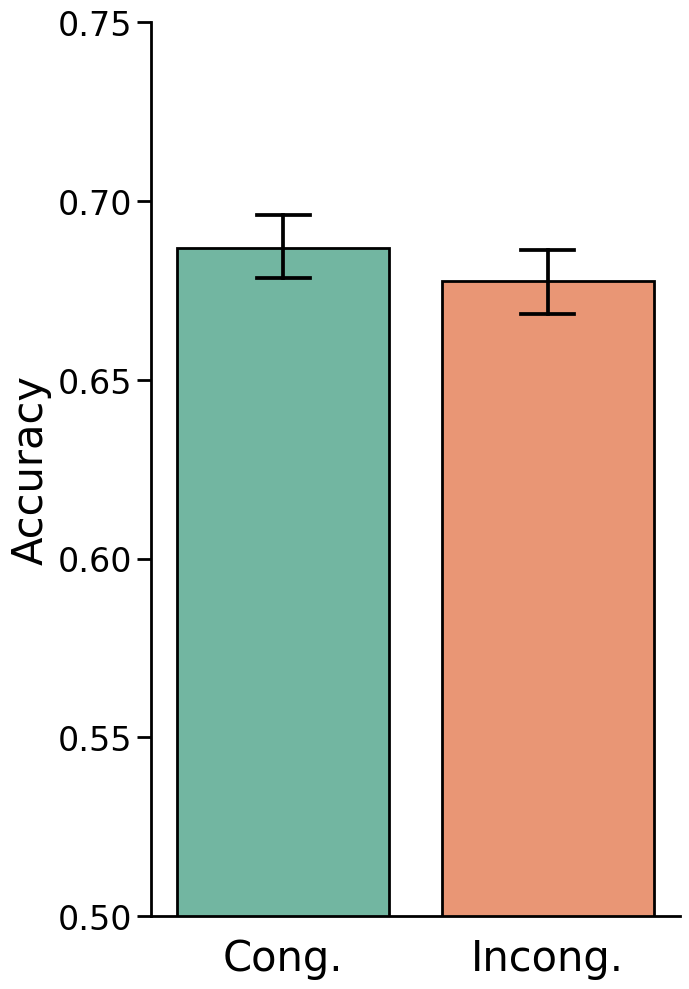

In [47]:
make_pretty_plot(p50means, measure='hit', cloudplot=False, saveimg=True)

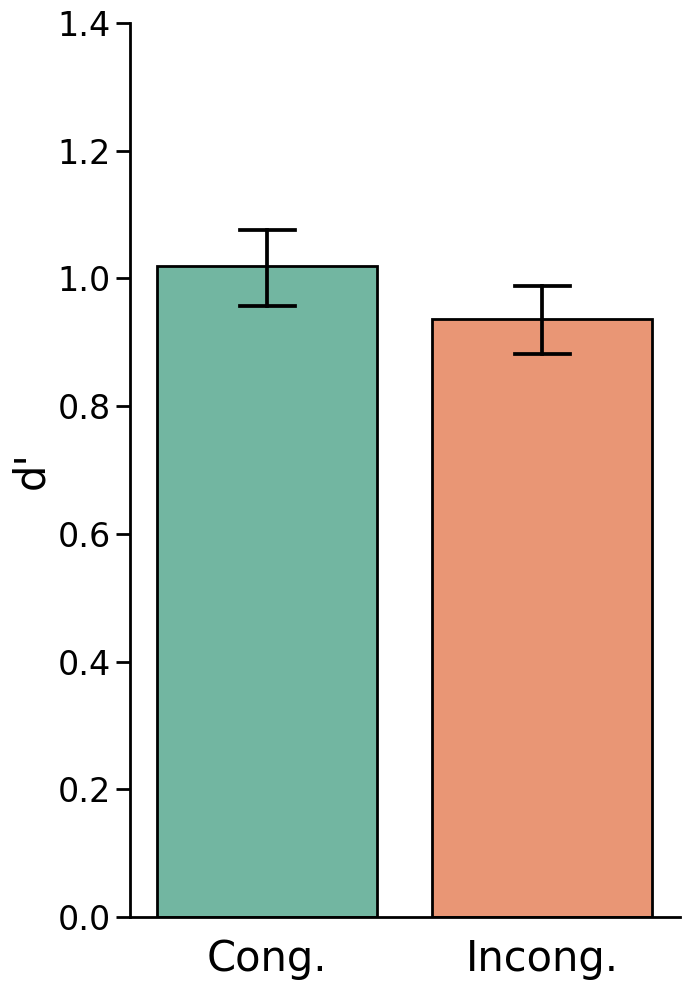

In [58]:
make_pretty_plot(p50means, measure='dprime', cloudplot=False, saveimg=True)

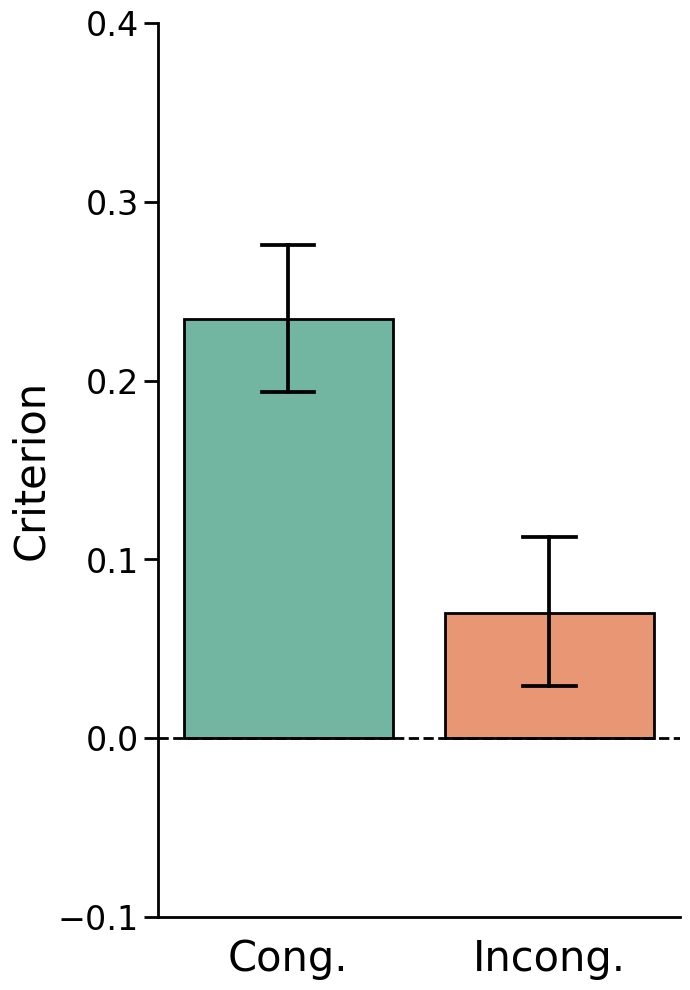

In [49]:
make_pretty_plot(p50means, measure='criterion', cloudplot=False, saveimg=True)

### Experiment 3

In [93]:
p25_overall = p25data.groupby(['subject']).mean().reset_index()
p25_overall['hit'].agg(['mean', 'sem'])

mean    0.687947
sem     0.007859
Name: hit, dtype: float64

In [94]:
p25_overall['criterion'].mean()

0.12591689142354998

In [95]:
pg.ttest(p25_overall['criterion'], 0.0)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.100477,50,two-sided,0.000151,"[0.06, 0.19]",0.574182,156.061,0.980328


In [84]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.684843  0.007955  0.986649  0.046958  0.083654  0.033940
1.0       0.697440  0.012094  1.066117  0.071671  0.252707  0.043569

In [51]:
pg.ttest(p25means[p25means['expected']==1].hit, 
         p25means[p25means['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.156226,50,two-sided,0.253084,"[-0.01, 0.03]",0.172326,0.286,0.226533


In [85]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.199625,50,two-sided,0.235939,"[-0.05, 0.21]",0.183664,0.3,0.250909


In [53]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.680714,50,two-sided,0.00057,"[0.08, 0.26]",0.606167,46.896,0.988826


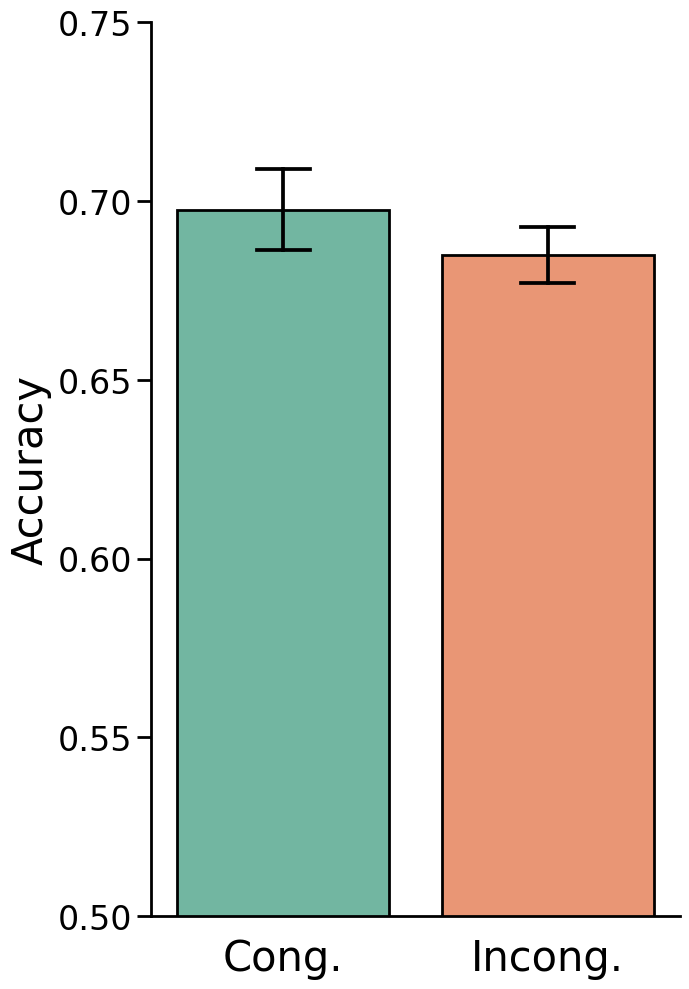

In [54]:
make_pretty_plot(p25means, measure='hit', cloudplot=False, saveimg=True)

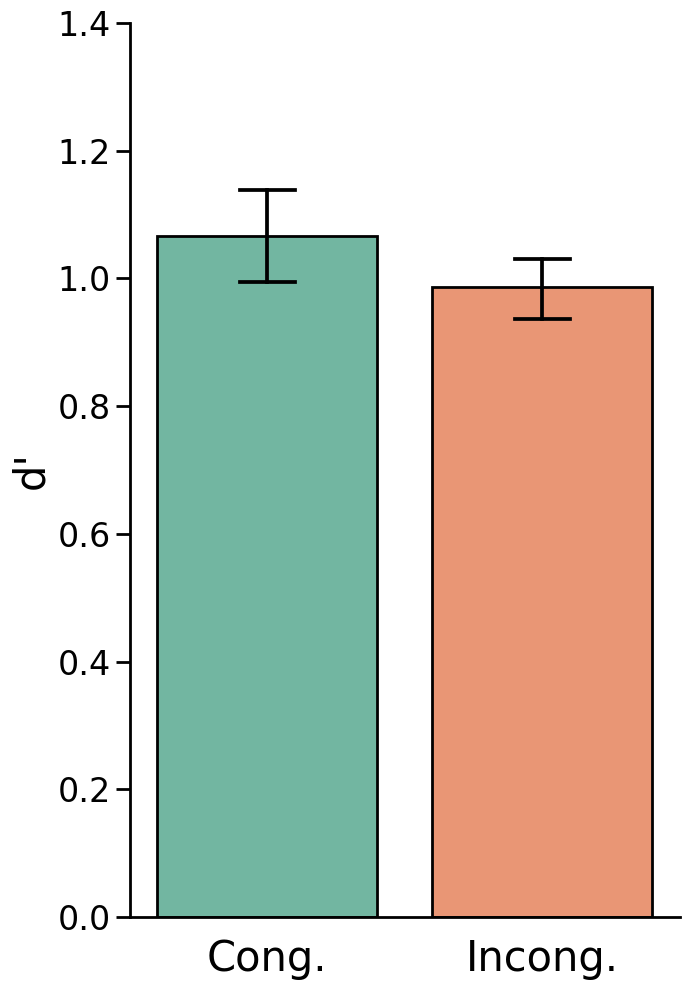

In [59]:
make_pretty_plot(p25means, measure='dprime', cloudplot=False, saveimg=True)

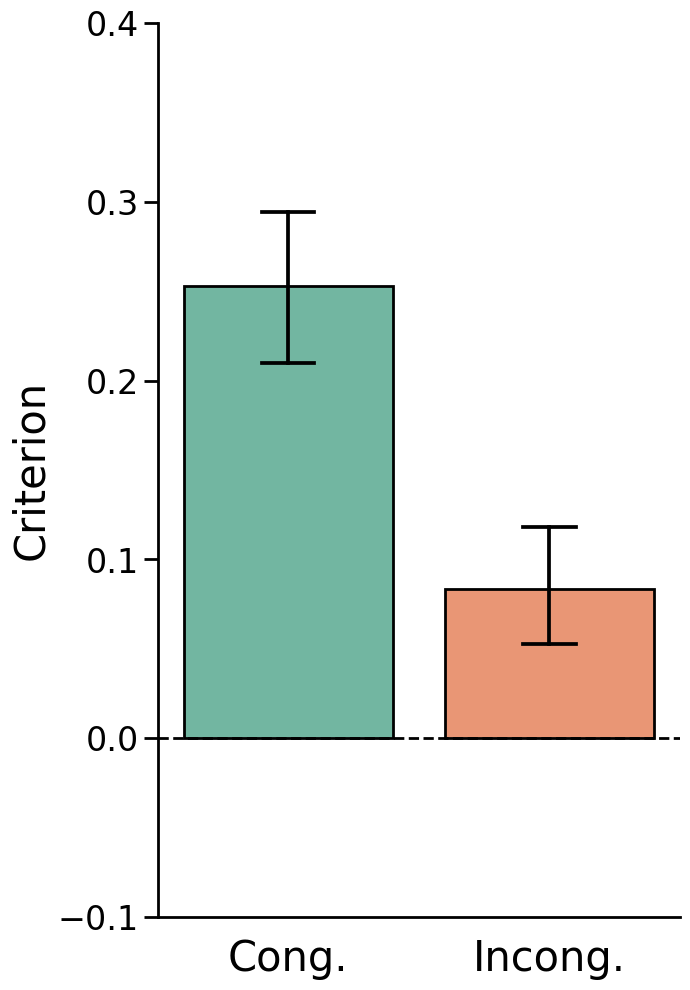

In [56]:
make_pretty_plot(p25means, measure='criterion', cloudplot=False, saveimg=True)

### Probability-congruency interaction (across experiments)

In [96]:
allmeans.subject.nunique()

151

In [97]:
aov = pg.mixed_anova(dv='hit', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
p_exp        0.025      2    148  0.013  1.954    0.145  0.026  nan
expected     0.028      1    148  0.028  9.420    0.003  0.060    1.000
Interaction  0.011      2    148  0.005  1.812    0.167  0.024  nan



In [98]:
aov = pg.mixed_anova(dv='dprime', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
p_exp        0.794      2    148  0.397   1.782    0.172  0.024  nan
expected     1.275      1    148  1.275  12.567    0.001  0.078    1.000
Interaction  0.359      2    148  0.180   1.771    0.174  0.023  nan



In [99]:
aov = pg.mixed_anova(dv='criterion', within='expected',
                             between='p_exp',
                             subject='subject', 
                             data=allmeans)
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
p_exp        0.179      2    148  0.089   0.863    0.424  0.012  nan
expected     2.626      1    148  2.626  41.732    0.000  0.220    1.000
Interaction  0.061      2    148  0.030   0.484    0.617  0.006  nan



In [23]:
allhitdiffs = []
allpexp = []
for pe in allmeans.p_exp.unique():
    thesediffs = list(allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==1)].hit.values - \
        allmeans[(allmeans['p_exp']==pe)&(allmeans['expected']==0)].hit.values)
    allhitdiffs.extend(thesediffs)
    allpexp.extend([pe] * len(thesediffs))
allhitdiffs = pd.DataFrame(list(zip(allpexp, allhitdiffs)), columns =['p_exp', 'diff'])

In [ ]:
# Pairwise tests
pairwisepvals = []
for pair in [[0.75, 0.5], [0.75, 0.25], [0.5, 0.25]]:
    tstats = pg.ttest(allhitdiffs[allhitdiffs['p_exp']==pair[0]]['diff'], allhitdiffs[allhitdiffs['p_exp']==pair[1]]['diff'])
    print(f"{pair[0]} vs. {pair[1]}")
    print('===================')
    pg.print_table(tstats)
    pairwisepvals.append(tstats['p-val'])
    print('-------------------')

In [ ]:
# Correct for multiple comparisons
pg.multicomp(pairwisepvals, method='bonf')

### Criterion-d' correlation

In [ ]:
sns.scatterplot(allmeans['hit'], allmeans['criterion'])
plt.show()

In [ ]:
pearsonr(p75means['hit'], p75means['criterion'])

In [ ]:
pearsonr(p75means['hit'], p75means['criterion'])

In [ ]:
allmeans

In [ ]:
sns.scatterplot(x='dprime', y='criterion', hue='p_exp', 
                hue_order=[0.75, 0.5, 0.25], data=allmeans[allmeans['expected']==1], palette='Set1')
plt.show()

In [ ]:
sns.scatterplot(x='dprime', y='criterion', data=allmeans[allmeans['expected']==0], palette='Set1')
plt.show()

In [ ]:
pearsonr(allmeans[allmeans['expected']==1]['dprime'], allmeans[allmeans['expected']==1]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==0]['dprime'], allmeans[allmeans['expected']==0]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==1]['hit'], allmeans[allmeans['expected']==1]['criterion'])

In [ ]:
pearsonr(allmeans[allmeans['expected']==0]['hit'], allmeans[allmeans['expected']==0]['criterion'])

In [ ]:
sns.scatterplot(allmeans['hit'], allmeans['dprime'])
plt.show()

In [ ]:
pearsonr(allmeans['hit'], allmeans['dprime'])

## Supplemental analyses

### Results without exclusions

In [100]:
allsubjdata_noexcl = compute_dprimes(allsubjdata_noexcl)
p75means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.75].groupby(
    ['subject', 'expected']).mean().reset_index()
p50means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.5].groupby(
    ['subject', 'expected']).mean().reset_index()
p25means_noexcl = allsubjdata_noexcl[allsubjdata_noexcl['p_exp']==0.25].groupby(
    ['subject', 'expected']).mean().reset_index()
allmeans_noexcl = allsubjdata_noexcl.groupby([
    'subject', 'expected', 'p_exp']).mean().reset_index()

Experiment 1

In [101]:
p75means_noexcl.groupby(['expected'])[['hit']].agg(['mean', 'sem'])

hit          
              mean       sem
expected                    
0.0       0.575588  0.010948
1.0       0.602094  0.010304

In [102]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].hit, 
         p75means_noexcl[p75means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.326241,96,two-sided,0.001248,"[0.01, 0.04]",0.253164,18.398,0.694418


In [103]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].dprime, 
         p75means_noexcl[p75means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.559923,96,two-sided,0.000579,"[0.07, 0.25]",0.28099,36.985,0.782213


In [104]:
pg.ttest(p75means_noexcl[p75means_noexcl['expected']==1].criterion, 
         p75means_noexcl[p75means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,6.1498,96,two-sided,1.776087e-08,"[0.17, 0.33]",0.767688,6.428e+05,1.0


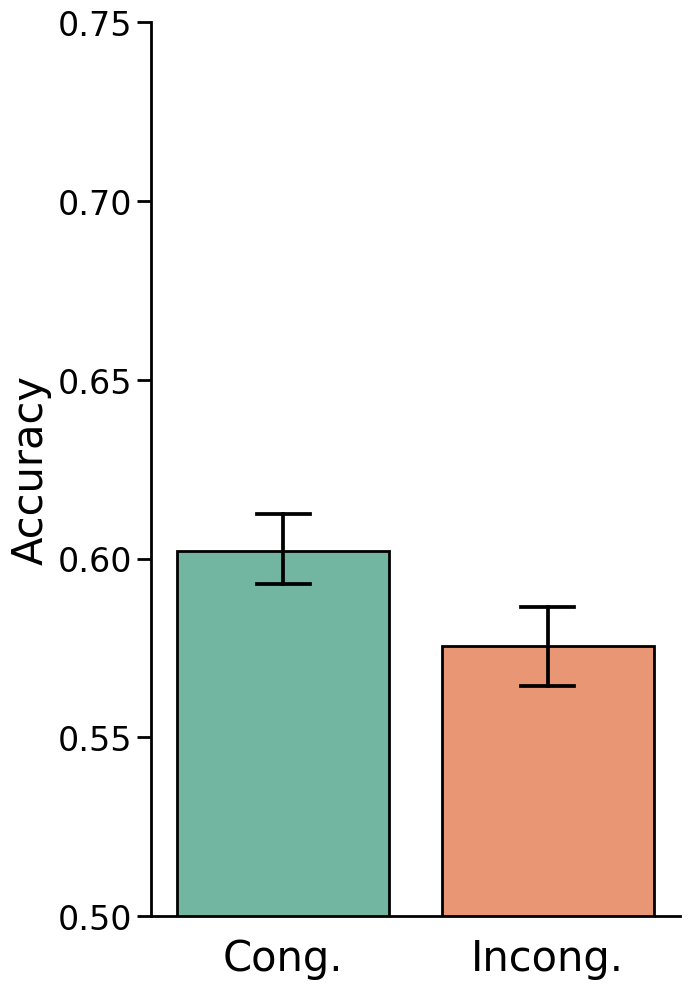

In [105]:
make_pretty_plot(p75means_noexcl, measure='hit', excl=False, saveimg=True)

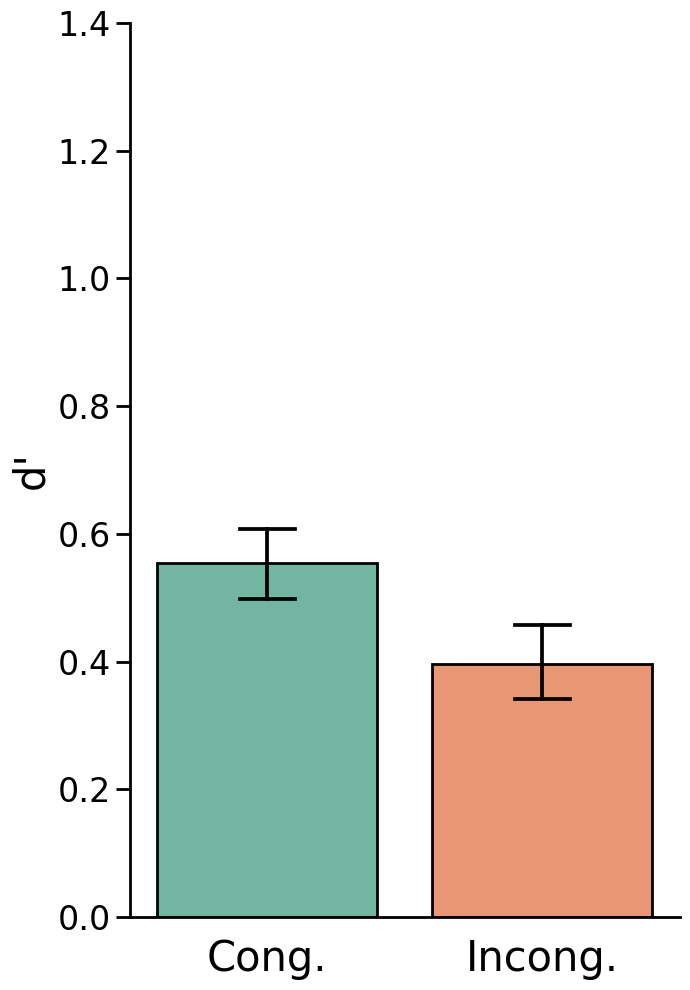

In [106]:
make_pretty_plot(p75means_noexcl, measure='dprime', excl=False, saveimg=True)

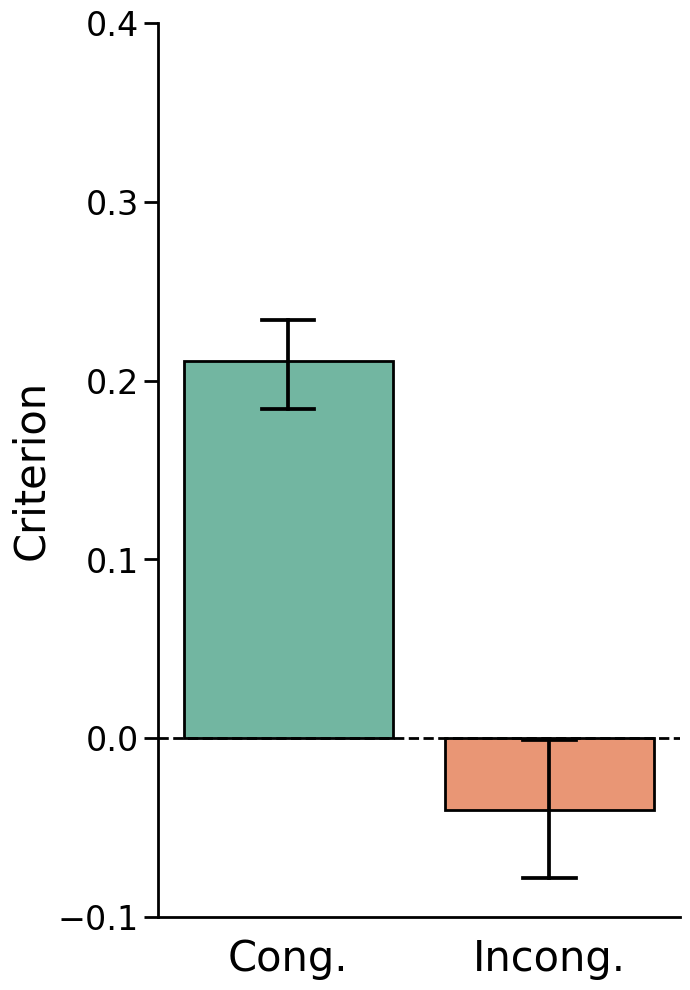

In [107]:
make_pretty_plot(p75means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 2

In [108]:
p50means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.606319  0.010897  0.561240  0.059403 -0.023710  0.034881
1.0       0.611007  0.011315  0.608328  0.063319  0.166813  0.037951

In [109]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].hit, 
         p50means_noexcl[p50means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.620478,86,two-sided,0.536584,"[-0.01, 0.02]",0.045254,0.143,0.070188


In [110]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].dprime, 
         p50means_noexcl[p50means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.087492,86,two-sided,0.279858,"[-0.04, 0.13]",0.082231,0.209,0.118058


In [111]:
pg.ttest(p50means_noexcl[p50means_noexcl['expected']==1].criterion, 
         p50means_noexcl[p50means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.618628,86,two-sided,0.000013,"[0.11, 0.27]",0.560416,1248.924,0.999332


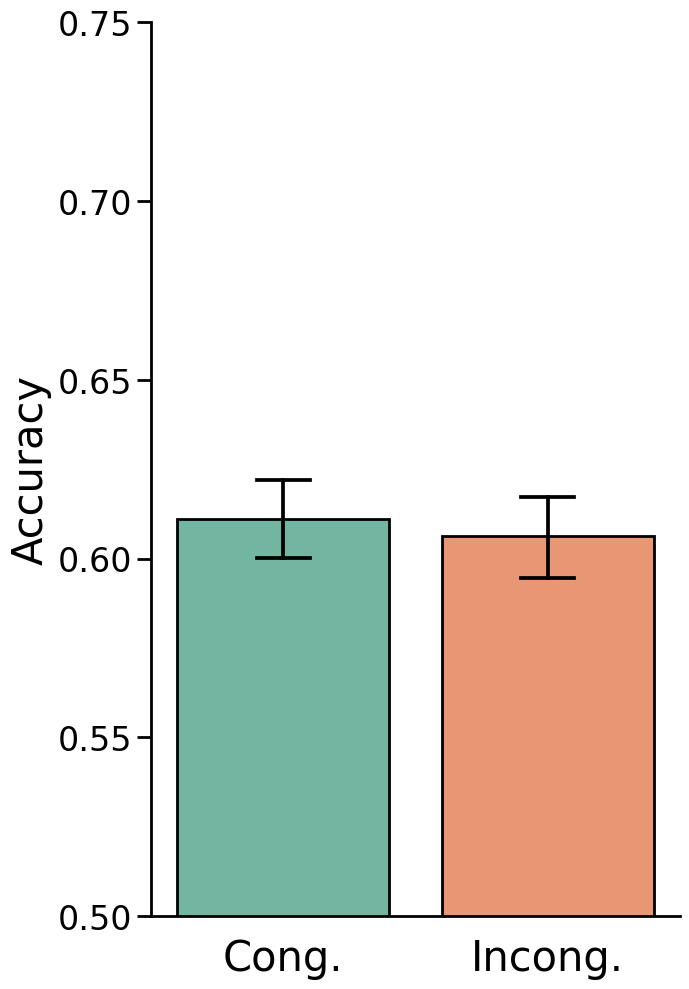

In [112]:
make_pretty_plot(p50means_noexcl, measure='hit', excl=False, saveimg=True)

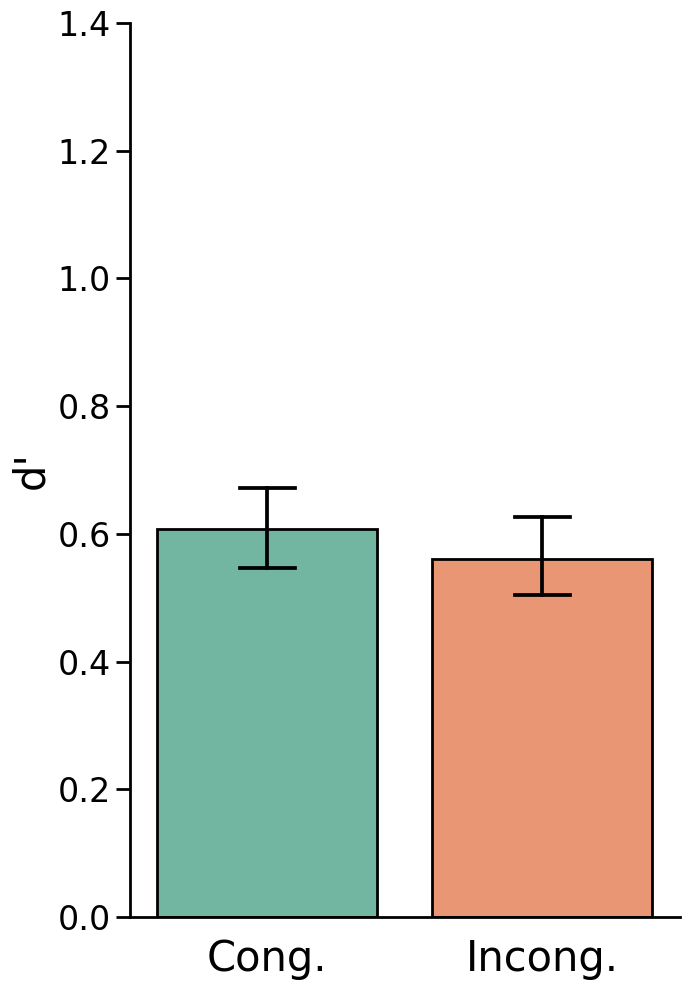

In [113]:
make_pretty_plot(p50means_noexcl, measure='dprime', excl=False, saveimg=True)

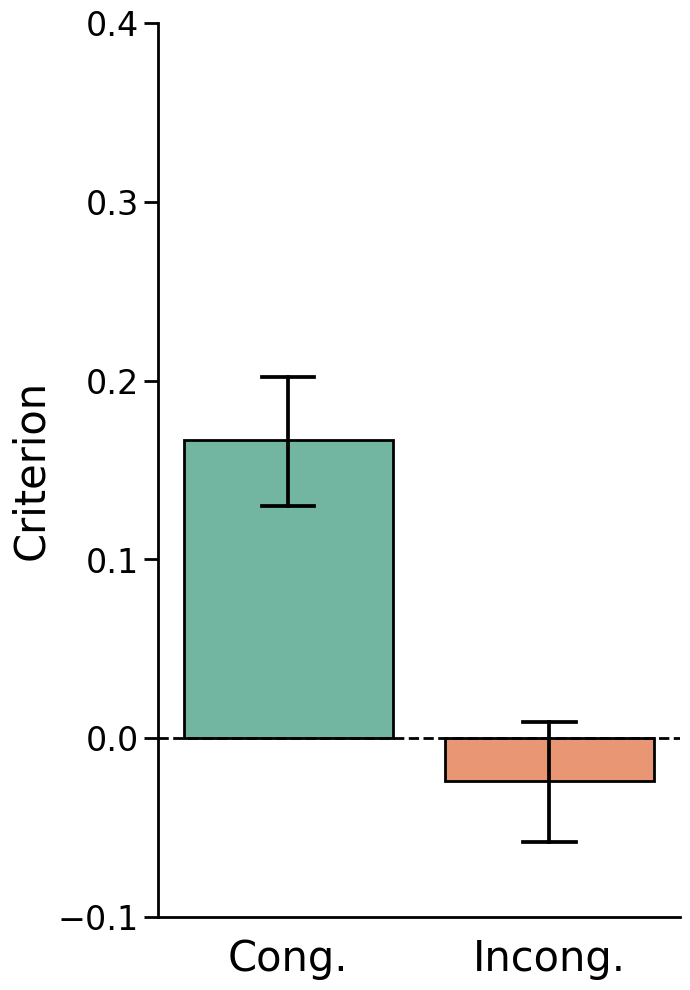

In [114]:
make_pretty_plot(p50means_noexcl, measure='criterion', excl=False, saveimg=True)

## Experiment 3

In [115]:
p25means_noexcl.groupby(['expected'])[['hit', 'dprime', 'criterion']].agg(['mean', 'sem'])

hit              dprime           criterion          
              mean       sem      mean       sem      mean       sem
expected                                                            
0.0       0.602704  0.010765  0.544691  0.058764  0.029747  0.027191
1.0       0.599965  0.013794  0.530960  0.076264  0.198373  0.039064

In [116]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].hit, 
         p25means_noexcl[p25means_noexcl['expected']==0].hit, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.33263,92,two-sided,0.74017,"[-0.02, 0.01]",0.022955,0.121,0.055515


In [117]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].dprime, 
         p25means_noexcl[p25means_noexcl['expected']==0].dprime, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-0.294241,92,two-sided,0.769236,"[-0.11, 0.08]",0.020914,0.12,0.054576


In [118]:
pg.ttest(p25means_noexcl[p25means_noexcl['expected']==1].criterion, 
         p25means_noexcl[p25means_noexcl['expected']==0].criterion, paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,3.935266,92,two-sided,0.000161,"[0.08, 0.25]",0.519556,121.413,0.998639


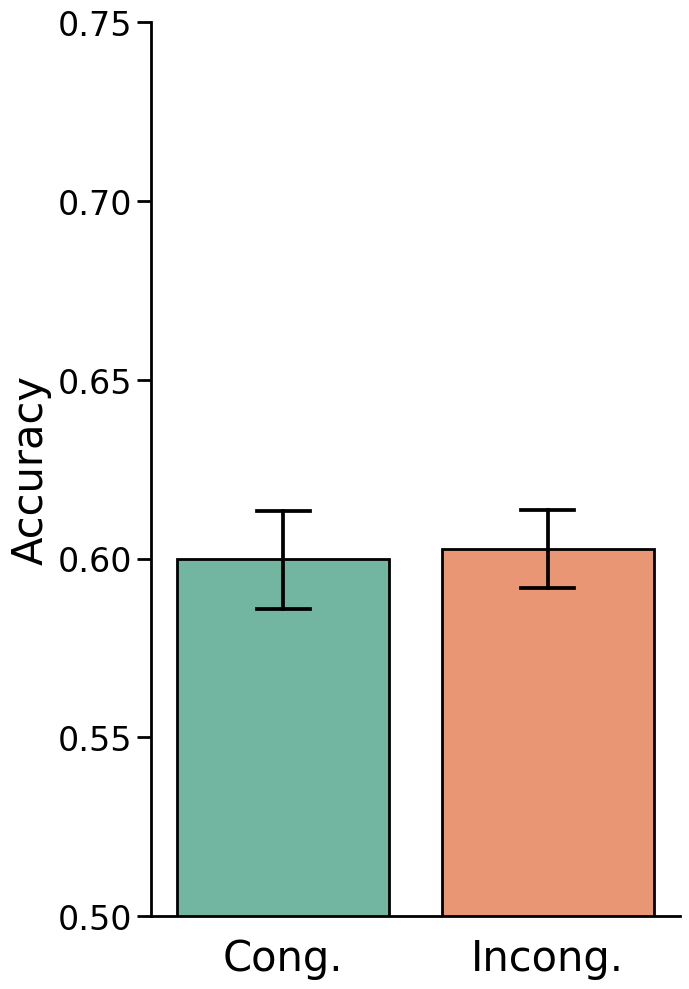

In [119]:
make_pretty_plot(p25means_noexcl, measure='hit', excl=False, saveimg=True)

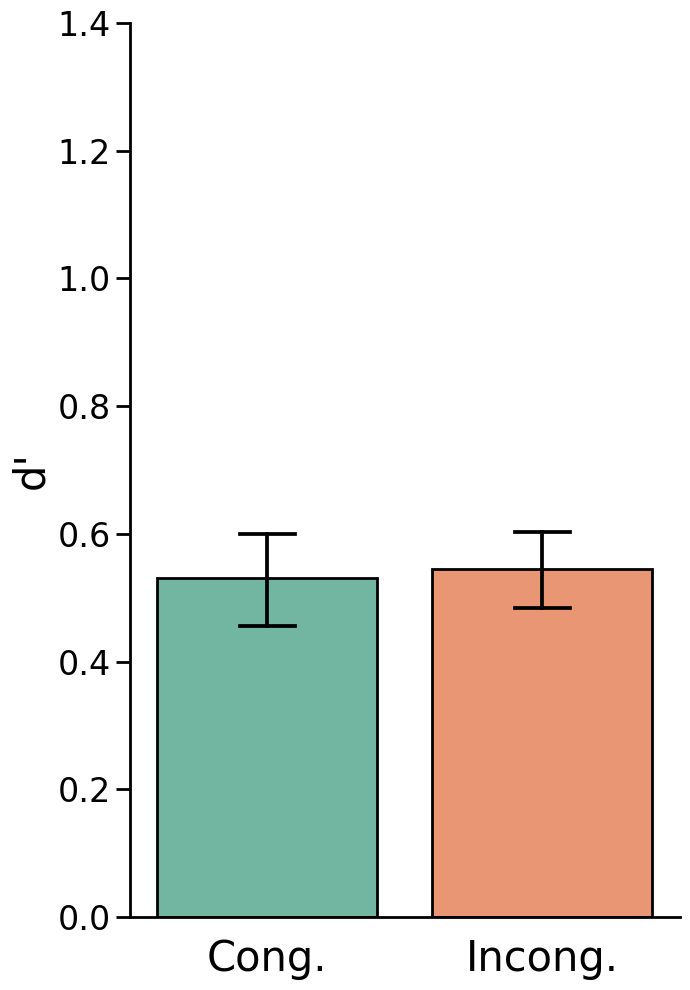

In [120]:
make_pretty_plot(p25means_noexcl, measure='dprime', excl=False, saveimg=True)

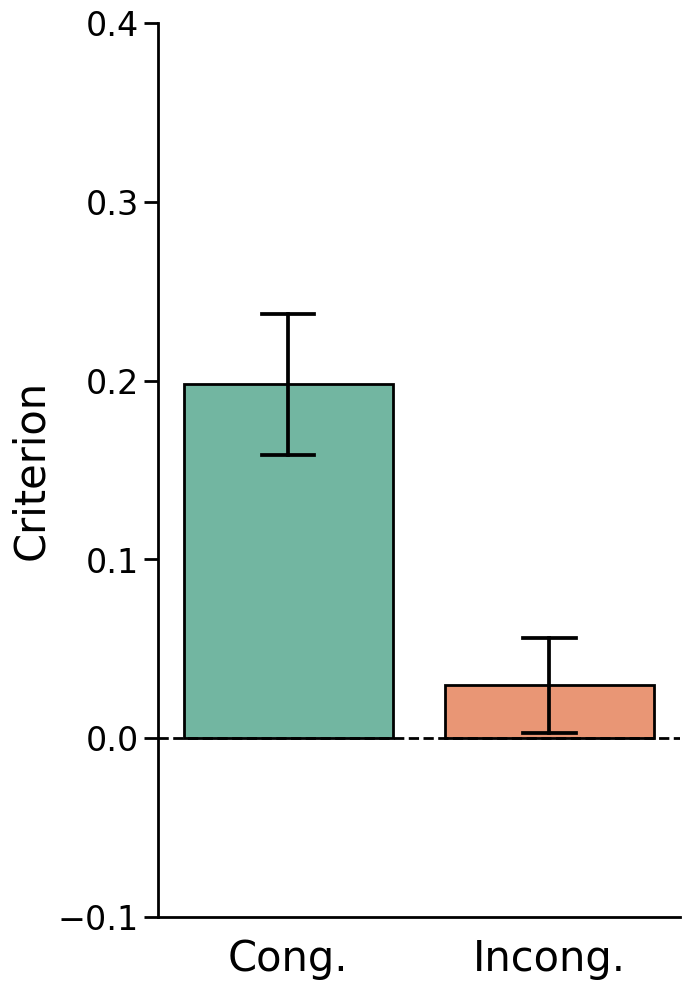

In [121]:
make_pretty_plot(p25means_noexcl, measure='criterion', excl=False, saveimg=True)

### Sensitivity and bias

Experiment 1

In [ ]:
# Mean accuracy for congruent and incongruent trials
p75means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p75means[p75means['expected']==1].hit, 
         p75means[p75means['expected']==0].hit, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].dprime, 
         p75means[p75means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p75means[p75means['expected']==1].criterion, 
         p75means[p75means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p75means, measure='dprime')

In [ ]:
make_pretty_plot(p75means, measure='criterion')

Experiment 2

In [ ]:
# Mean accuracy for congruent and incongruent trials
p50means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p50means[p50means['expected']==1].dprime, 
         p50means[p50means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p50means[p50means['expected']==1].criterion, 
         p50means[p50means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p50means, measure='dprime')

In [ ]:
make_pretty_plot(p50means, measure='criterion')

Experiment 3

In [ ]:
# Mean accuracy for congruent and incongruent trials
p25means.groupby(['expected'])[['dprime', 'criterion']].agg(['mean', 'sem'])

In [ ]:
pg.ttest(p25means[p25means['expected']==1].dprime, 
         p25means[p25means['expected']==0].dprime, paired=True)

In [ ]:
pg.ttest(p25means[p25means['expected']==1].criterion, 
         p25means[p25means['expected']==0].criterion, paired=True)

In [ ]:
make_pretty_plot(p25means, measure='dprime')

In [ ]:
make_pretty_plot(p25means, measure='criterion')

### Final survey

In [123]:
allsurveys = get_surveys(allsubjdata)

In [124]:
allsurveys.subject.nunique()

151

In [125]:
allsurveys.groupby(['p_exp'])[['sequence_attention', 
                               'object_expect',
                               'percent_expected']].agg(['mean', 'sem'])

sequence_attention           object_expect           percent_expected  \
                    mean       sem          mean       sem             mean   
p_exp                                                                         
0.25            4.019608  0.230073      3.313725  0.238443        55.843137   
0.50            4.300000  0.208493      3.760000  0.216767        54.500000   
0.75            4.420000  0.189715      3.530612  0.244153        56.960000   

                 
            sem  
p_exp            
0.25   2.936367  
0.50   2.393571  
0.75   2.446982

In [ ]:
aov = pg.welch_anova(dv='sequence_attention', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [ ]:
aov = pg.welch_anova(dv='object_expect', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [ ]:
aov = pg.welch_anova(dv='percent_expected', between='p_exp', data=allsurveys)

pg.print_table(aov)

In [126]:
print('==================')
print('Overall')
print('------------------')
accdiffs = allmeans[allmeans['expected']==1].hit.values - \
           allmeans[allmeans['expected']==0].hit.values
critdiffs = allmeans[allmeans['expected']==1].criterion.values - \
            allmeans[allmeans['expected']==0].criterion.values
dprdiffs = allmeans[allmeans['expected']==1].dprime.values - \
           allmeans[allmeans['expected']==0].dprime.values
print('Accuracy-sequence attention correlation:')
stats = pg.corr(allsurveys.sequence_attention, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-object prediction correlation:')
stats = pg.corr(allsurveys.object_expect, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

print('Accuracy-probability estimate correlation:')
stats = pg.corr(allsurveys.percent_expected, accdiffs, method='pearson')
print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

for pe in [0.75, 0.5, 0.25]:
    print('==================')
    print('P(Exp) =', pe)
    print('------------------')
    thispexp = allmeans[allmeans['p_exp']==pe]
    critdiffs = thispexp[thispexp['expected']==1].criterion.values - \
                thispexp[thispexp['expected']==0].criterion.values
    dprdiffs = thispexp[thispexp['expected']==1].dprime.values - \
               thispexp[thispexp['expected']==0].dprime.values
    accdiffs = thispexp[thispexp['expected']==1].hit.values - \
               thispexp[thispexp['expected']==0].hit.values
    print('Accuracy-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-sequence attention correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].sequence_attention, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-object prediction correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].object_expect, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    
    print('-------------------------------')
    print('Accuracy-probability estimate correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, accdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('D prime-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, dprdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')
    print('Criterion-probability correlation:')
    stats = pg.corr(allsurveys[allsurveys['p_exp']==pe].percent_expected, critdiffs, method='pearson')
    print('r =', stats['r'][0], '- p =', stats['p-val'][0], '- BF01 =', 1/float(stats['BF10'][0]), '\n')

Overall
------------------
Accuracy-sequence attention correlation:
r = 0.03999653961215315 - p = 0.625835517455807 - BF01 = 8.695652173913043 

Accuracy-object prediction correlation:
r = -0.09091310134893812 - p = 0.26853958145262513 - BF01 = 5.347593582887701 

Accuracy-probability estimate correlation:
r = -0.021467466235181566 - p = 0.7936030994246064 - BF01 = 9.523809523809524 

P(Exp) = 0.75
------------------
Accuracy-sequence attention correlation:
r = 0.17373497492606538 - p = 0.22757793057253117 - BF01 = 2.793296089385475 

D prime-sequence attention correlation:
r = 0.12686976824021287 - p = 0.37996019557266947 - BF01 = 3.8910505836575875 

Criterion-sequence attention correlation:
r = 0.07114819457012922 - p = 0.6234320771148033 - BF01 = 5.05050505050505 

-------------------------------
Accuracy-object prediction correlation:
r = -0.2926399671352069 - p = 0.04129987936638242 - BF01 = 0.7429420505200593 

D prime-object prediction correlation:
r = -0.3294073314337379 - p =